In [1]:
library(faraway)
library(MASS)

In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)

In [3]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "insurance.csv", sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [4]:
# Kiểm tra số dòng và số cột của dữ liệu:
dim(df)

[1] 1338    7

- Bộ dữ liệu gồm có 1338 dòng và 7 cột

### NỘI DUNG CÁC CỘT DỮ LIỆU
- age: Tuổi của người được bảo hiểm.
- sex: Giới tính của người được bảo hiểm
- bmi: Chỉ số khối cơ thể (Body Mass Index - BMI) của người được bảo hiểm. Chỉ số này được tính bằng cách chia cân nặng (kg) cho bình phương chiều cao (m)
- children: Số con của người được bảo hiểm.
- smoker: Trạng thái hút thuốc của người được bảo hiểm
    - yes: Có hút thuốc
    - no: Không hút thuốc 
- region: Vùng miền nơi người được bảo hiểm sinh sống.
    - northeast: Đông Bắc
    - northwest: Tây Bắc
    - southeast: Đông Nam
    - southwest: Tây Nam
- charges: Số tiền bảo hiểm y tế phải trả

In [5]:
# Kiểm tra dữ liệu
str(df) # Xem cấu trúc dữ liệu

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [6]:
summary(df)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

In [7]:
# Kiểm tra dữ liệu unique của bộ dữ liệu
for (col in colnames(df)) {
    print(col)
    print(length(unique(df[[col]])))
}


[1] "age"
[1] 47
[1] "sex"
[1] 2
[1] "bmi"
[1] 548
[1] "children"
[1] 6
[1] "smoker"
[1] 2
[1] "region"
[1] 4
[1] "charges"
[1] 1337


- age (tuổi: 18-64, trung bình: 39.21),
- sex (giới tính: 2 loại female hoặc male),
- bmi (chỉ số BMI: 15.96-53.13, trung bình: 30.66),
- children (số con: 0-5, trung bình: 1.095),
- smoker (hút thuốc: có hút thuốc: yes, không hút thuốc: no)
- region (vùng miền: northeast: Đông Bắc, northwest: Tây Bắc, southeast: Đông Nam, southwest: Tây Nam)
- charges (phí bảo hiểm: 1122-63770, trung bình: 13270)

In [8]:
colSums(is.na(df))

age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0

- Không có dữ liệu thiếu

# LỰA CHỌN BÀI TOÁN:
- Y: biến charges
- X1: region: Vị trí địa lý
- X2: sex: Giới tính
- Mô hình two-way ANOVA sẽ phân tích ảnh hưởng của vị trí địa lý (region) và giới tính (sex) lên phí bảo hiểm (charges), cùng với tương tác giữa hai yếu tố này.

In [9]:
# Giữa lại các cột dữ liệu cần phân tích
df = df[, c("charges", "region", "sex")]
df[["region"]] = as.factor(df[["region"]])
df[["sex"]] = as.factor(df[["sex"]])
head(df)

,charges,region,sex
,<dbl>,<fct>,<fct>
1,16884.924,southwest,female
2,1725.552,southeast,male
3,4449.462,southeast,male
4,21984.471,northwest,male
5,3866.855,northwest,male
6,3756.622,southeast,female


In [22]:
str(df)

'data.frame':	1338 obs. of  3 variables:
 $ charges: num  16885 1726 4449 21984 3867 ...
 $ region : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ sex    : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...


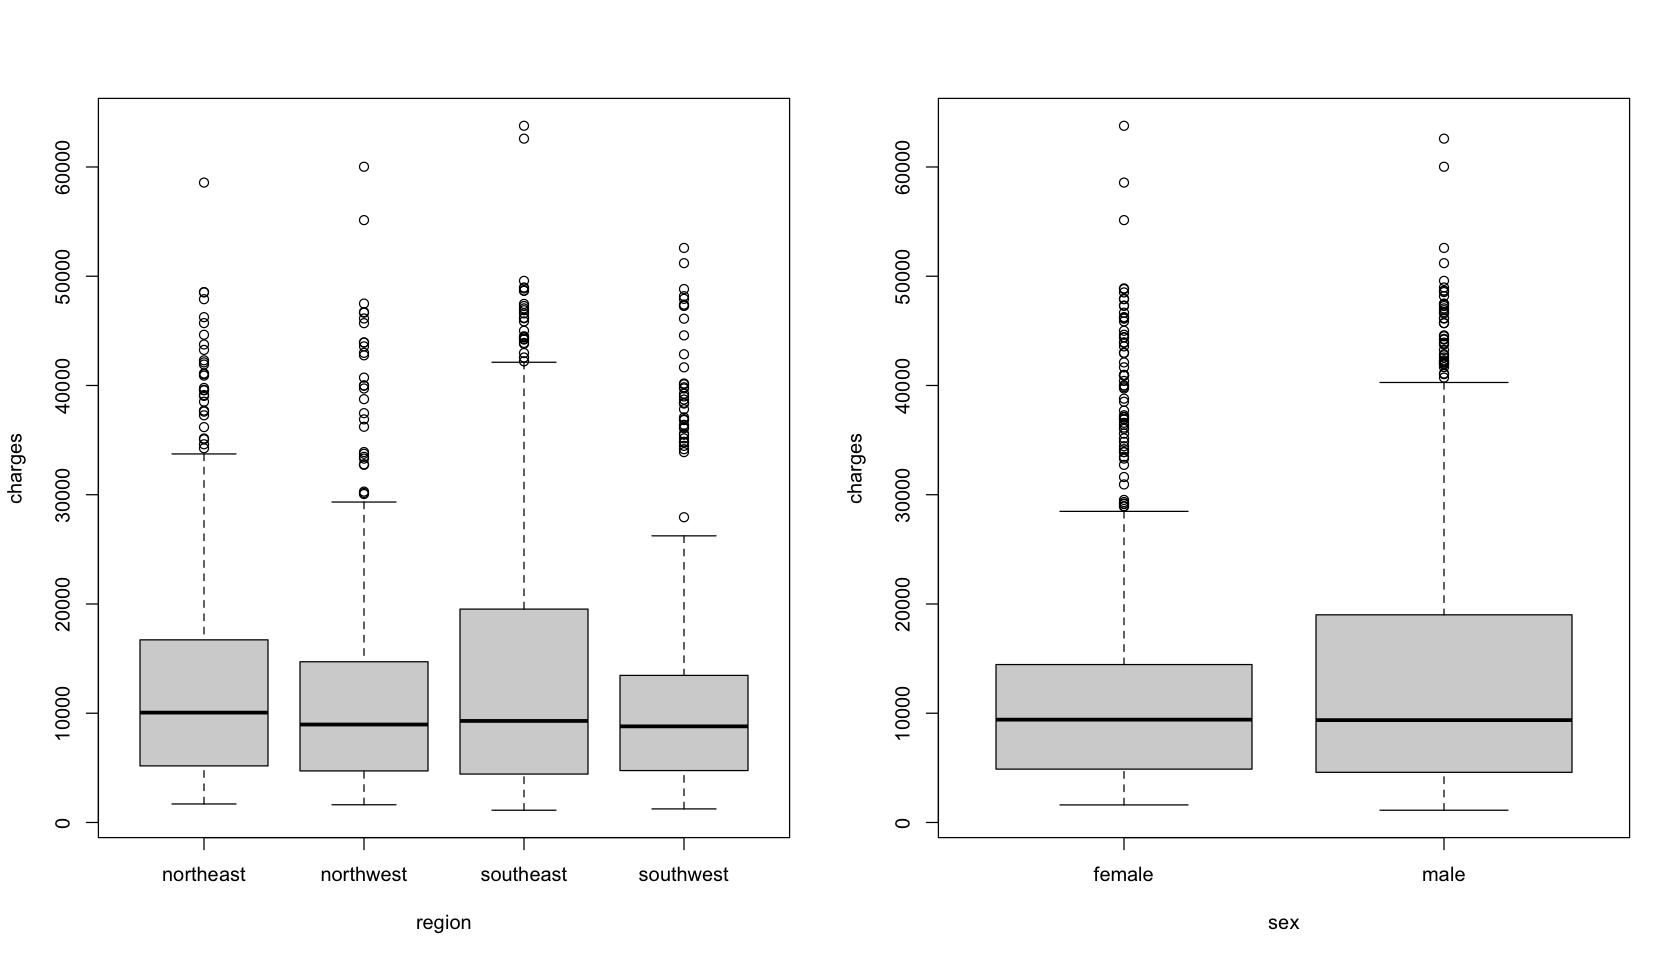

In [10]:
options(repr.plot.width = 14, repr.plot.height = 8)
par(mfrow = c(1, 2), mar = c(5, 4, 4, 2) + 0.1)
plot(charges ~ region, data = df)
plot(charges ~ sex, data = df)

- Các giá trị charges (phí bảo hiểm) phân bố khác nhau tùy theo khu vực (region).
Khu vực southeast có mức median (giá trị trung bình) cao nhất so với các khu vực khác (northeast, northwest, southwest).
- Khu vực southeast cũng có nhiều giá trị ngoại lệ (outliers) với phí bảo hiểm rất cao.
- Các khu vực khác như northeast, northwest, và southwest có mức median gần như nhau, nhưng southwest có xu hướng phí bảo hiểm thấp hơn một chút.
- Các giá trị charges phân bố tương tự nhau giữa hai giới tính (sex), với mức median gần như tương đương.
- Cả hai nhóm giới tính đều có nhiều giá trị ngoại lệ với phí bảo hiểm rất cao.
- Nhìn chung, không có sự khác biệt đáng kể giữa phí bảo hiểm của nam và nữ.

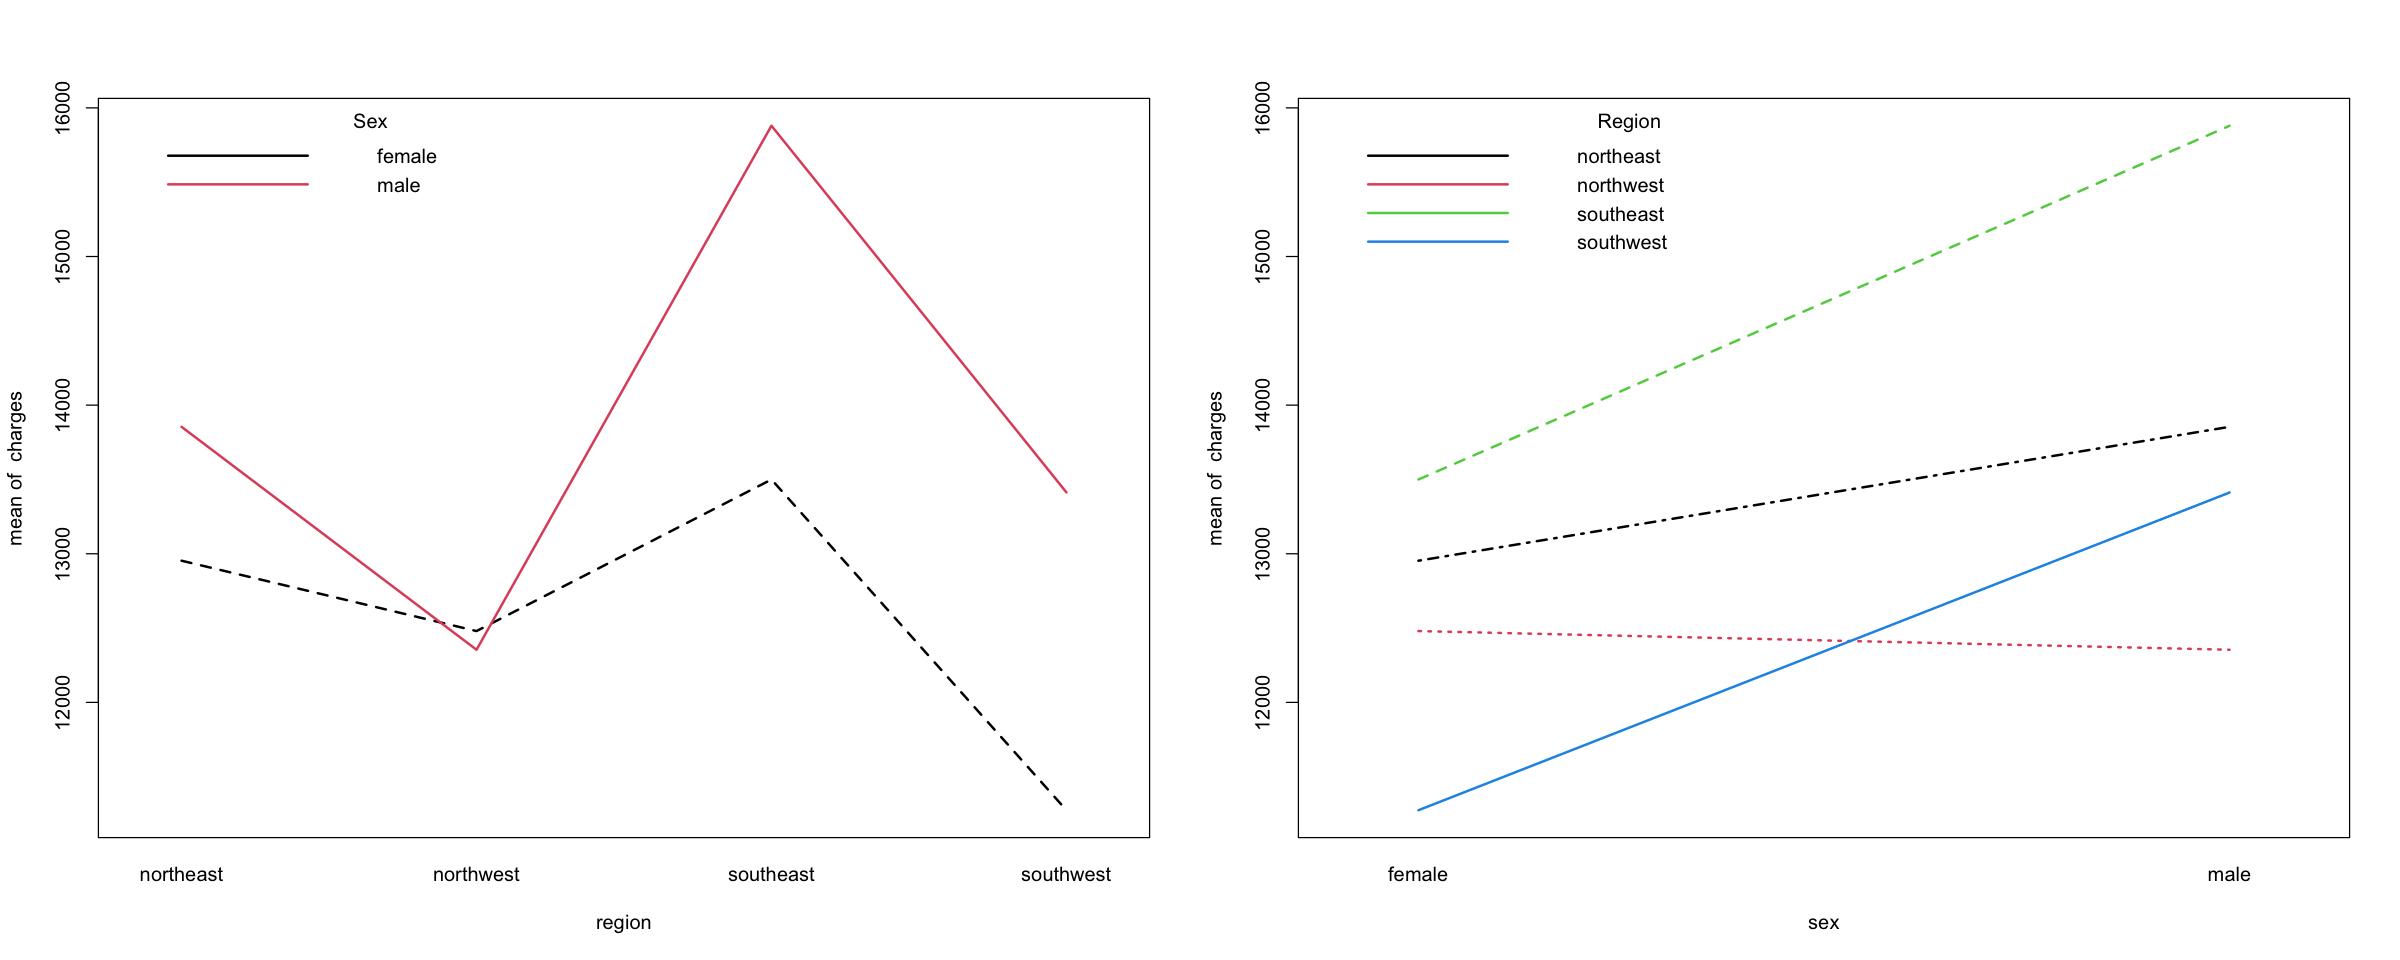

In [31]:
options(repr.plot.width = 20, repr.plot.height = 8)
par(mfrow = c(1, 2), mar = c(5, 4, 4, 2) + 0.1, xpd = TRUE)

with(df, interaction.plot(region, sex, charges, lwd = 2, col = 1:2, legend = FALSE))
legend("topleft", legend = levels(df$sex), col = 1:2, lwd = 2, bty = "n", title = "Sex")

with(df, interaction.plot(sex, region, charges, lwd = 2, col = 1:4, legend = FALSE))
legend("topleft", legend = levels(df$region), col = 1:4, lwd = 2, bty = "n", title = "Region")


- Chi phí bảo hiểm trung bình cho nữ thay đổi nhẹ nhàng hơn giữa các vùng so với nam.
- Đối với nam, chi phí bảo hiểm trung bình cao nhất ở vùng northeast và thấp nhất ở vùng northwest.
- Đối với nữ, chi phí trung bình gần như tương đối đồng đều giữa các vùng northeast, northwest, và southwest.
- Chi phí trung bình cho cả nam và nữ là cao nhất ở vùng northeast và thấp nhất ở vùng southwest.
- Đường kẻ đại diện cho vùng southeast có độ dốc cao nhất, chỉ ra rằng chi phí trung bình tăng nhanh hơn ở vùng này khi chuyển từ nữ sang nam.
- Chi phí trung bình của nữ thấp hơn so với nam ở tất cả các vùng, với sự khác biệt lớn nhất ở vùng northeast.
- Có sự tương tác rõ ràng giữa giới tính và vùng đối với chi phí bảo hiểm y tế.
- Chi phí trung bình cho nam thường cao hơn so với nữ trong mọi vùng.
- Vùng northeast có chi phí trung bình cao nhất cho cả hai giới, trong khi vùng southwest có chi phí trung bình thấp nhất.